<a href="https://colab.research.google.com/github/adammoss/MLiS2/blob/master/examples/intro/backprop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let us again attempt to learn the XOR function using the same MLP network,  this time starting with random initial weights and using back-propogation with simple gradient descent.

The error functions for each neuron are
\begin{eqnarray}
\Delta_1^{(2)} &=& {\partial{J} \over \partial a_1^{(2)}}\,, \\
\Delta_1^{(1)} &=&  \Delta_1^{(2)} W_{11}^{(2)}   \Theta ( z_1^{(1)} )  \\
\Delta_2^{(1)} &=&  \Delta_1^{(2)} W_{21}^{(2)}  \Theta ( z_2^{(1)} )  \,,
\end{eqnarray}
since the Heaviside step function $\Theta$ is the derivative of the ReLU activation function.

In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
np.random.seed(2)

In [62]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
print(X)

[[0 0]
 [0 1]
 [1 0]
 [1 1]]


In [63]:
Y = np.array([[0], [1], [1], [0]])
print(Y)

[[0]
 [1]
 [1]
 [0]]


Define the MLP model

In [64]:
from scipy.special import expit

class MLP(object):

  def __init__(self):
    # Initialise with random weights
    self.weights_1 = 0.1 * np.random.normal(size=(3,2))
    self.weights_2 = 0.1 * np.random.normal(size=(3,1))

  def forward(self, x):
    # Do a forward pass
    if len(x.shape) == 1:
      # Single example, so add a batch dimension of 1
      x = np.expand_dims(x, axis=0)
    # Hidden layer 
    z_1 = np.matmul(np.hstack((np.ones(shape=(x.shape[0], 1)), x)), self.weights_1)
    # Apply ReLU activation function
    a_1 = np.maximum(z_1, 0)
    # Output layer
    z_2 = np.matmul(np.hstack((np.ones(shape=(a_1.shape[0], 1)), a_1)), self.weights_2)
    # Linear activation 
    a_2 = expit(z_2)        #sigmoid. 
    return z_1, a_1, z_2, a_2

Push the true solution through the network and check it gives zero loss

In [65]:
m = MLP()
m.weights_1 = np.array([[0, -1], [1,1], [1,1]], dtype=float)
m.weights_2 = np.array([[0], [1], [-2]], dtype=float)
z_1, a_1, z_2, a_2 = m.forward(X)
print(0.25 * np.sum((a_2 - Y)**2))

0.16116474406425663


In [66]:
num_epochs = 500
learning_rate = 0.1

Update random initial weights and biases by back-prop

In [67]:
from keras.losses import binary_crossentropy

m = MLP()
loss_history = []
weights_1_history = []
weights_2_history = []
for epoch in range(num_epochs):
  # Do forward pass
  z_1, a_1, z_2, a_2 = m.forward(X)
  loss = binary_crossentropy(Y, a_2)                #0.25 * np.sum((a_2 - Y)**2)
  loss_history.append(loss)
  if epoch % 100 == 0:
    print(f'Epoch: {epoch} - Loss: {loss}')
  # Delta_2 has shape(4, 1), the first dimension being the batch dimension
  delta_2 = 0.5 * ( a_2 - Y)
  g_prime_1 = np.heaviside(z_1, 0)
  # Delta_1 has shape (4, 2)
  delta_1 = np.matmul(delta_2, m.weights_2[1:3, :].T) * g_prime_1
  # Biases of layers connecting input and hidden layers
  m.weights_1[0, :] -= learning_rate * np.sum(delta_1[:, :], axis=0)
  # Weights of layers connecting input and hidden layers 
  m.weights_1[1:3, :] -= learning_rate * np.matmul(X.T, delta_1)
  # Biases of layers connecting hidden and output layers
  m.weights_2[0, :] -= learning_rate * np.sum(delta_2[:, :], axis=0)
  # Weights of layers connecting hidden and output layers
  m.weights_2[1:3, :] -= learning_rate * np.matmul(a_1.T, delta_2)
  weights_1_history.append(np.copy(m.weights_1))
  weights_2_history.append(np.copy(m.weights_2))
loss_history = np.array(loss_history)
weights_1_history = np.array(weights_1_history)
weights_2_history = np.array(weights_2_history)

Epoch: 0 - Loss: [0.66693188 0.71682218 0.71995356 0.67023332]
Epoch: 100 - Loss: [0.67683575 0.7067852  0.61161721 0.68192773]
Epoch: 200 - Loss: [0.53636042 0.86362571 0.19997168 0.53680394]
Epoch: 300 - Loss: [0.3798975  0.49527428 0.05086184 0.38339898]
Epoch: 400 - Loss: [0.1488023  0.07478152 0.03544458 0.1488023 ]


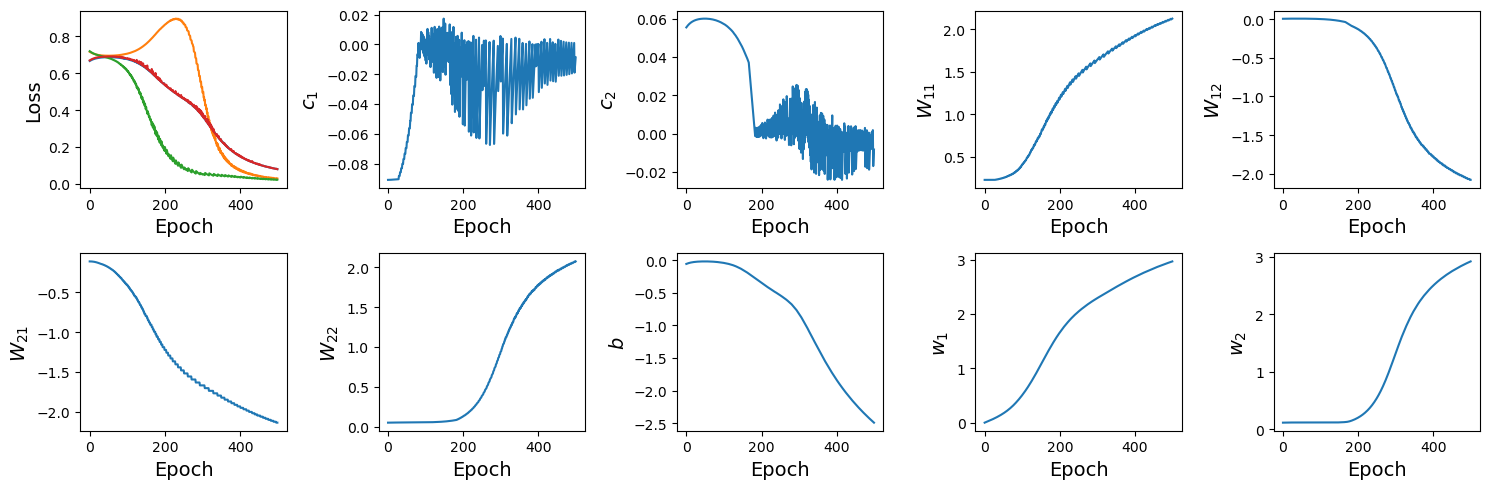

In [68]:
plt.figure(figsize=(15, 5))
ax = plt.subplot(2, 5, 1)
ax.plot(loss_history[:])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('Loss', fontsize=14)
ax = plt.subplot(2, 5, 2)
ax.plot(weights_1_history[:,0,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$c_1$', fontsize=14)
ax = plt.subplot(2, 5, 3)
ax.plot(weights_1_history[:,0,1])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$c_2$', fontsize=14)
ax = plt.subplot(2, 5, 4)
ax.plot(weights_1_history[:,1,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$W_{11}$', fontsize=14)
ax = plt.subplot(2, 5, 5)
ax.plot(weights_1_history[:,1,1])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$W_{12}$', fontsize=14)
ax = plt.subplot(2, 5, 6)
ax.plot(weights_1_history[:,2,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$W_{21}$', fontsize=14)
ax = plt.subplot(2, 5, 7)
ax.plot(weights_1_history[:,2,1])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$W_{22}$', fontsize=14)
ax = plt.subplot(2, 5, 8)
ax.plot(weights_2_history[:,0,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$b$', fontsize=14)
ax = plt.subplot(2, 5, 9)
ax.plot(weights_2_history[:,1,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax = plt.subplot(2, 5, 10)
ax.plot(weights_2_history[:,2,0])
ax.set_xlabel('Epoch', fontsize=14)
ax.set_ylabel('$w_2$', fontsize=14)
plt.tight_layout()
plt.show()

In [69]:
print(m.weights_1)

[[-0.00876389 -0.00826887]
 [ 2.12641327 -2.07762887]
 [-2.13598664  2.07122175]]


In [70]:
print(m.weights_2)

[[-2.49152191]
 [ 2.96626987]
 [ 2.91903805]]


In [71]:
z_1, a_1, z_2, a_2 = m.forward(X)
print(a_2)

[[0.07645467]
 [0.97153815]
 [0.97790363]
 [0.07645467]]
